In [1]:
import sympy
from sympy import Matrix
import numpy as np


In [2]:
from IPython.display import display, HTML

def hide_input():
    return display(HTML('<style>.jp-InputArea { display: none; }</style>'))

hide_input()


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Linear algebra

## Session 02: Inner product, solving systems of linear equations

## Gerhard Jäger

### November 2, 2023

# The inner product of vectors

- the **inner product** of two vectors is a scalar

$$
\begin{aligned}
\mathbf{x}\cdot \mathbf{y} &\doteq x_1y_1 + x_2y_2 + \cdots + x_n y_n\\
&= \sum_i x_iy_i
\end{aligned}
$$
(Sometimes the inner product is written $\langle\mathbf{x}, \mathbf{y}\rangle$.)

- the inner product is commutative 

$$
\mathbf{x}\cdot \mathbf{y} = \mathbf{y}\cdot \mathbf{x}
$$

- Furthermore, the inner product is **linear** in both arguments

$$
\begin{aligned}
(a\mathbf{x})\cdot(b\mathbf{y}) &= ab(\mathbf{x}\cdot\mathbf{y})\\
\mathbf{x}\cdot(\mathbf{y} + \mathbf{z}) &= \mathbf{x}\cdot\mathbf{y} + \mathbf{x}\cdot\mathbf{z}\\
(\mathbf{x}+\mathbf{y})\cdot\mathbf{z} &= \mathbf{x}\cdot\mathbf{z} + \mathbf{y}\cdot\mathbf{z}
\end{aligned}
$$


### norm of a vector

The **norm** (=length) of a vector is defined as

$$
\begin{aligned}
\|\mathbf{x}\| &\doteq \sqrt{\mathbf{x}\cdot \mathbf{x}} \\
&= \sqrt{\sum_i x_i^2}
\end{aligned}
$$

### properties of the norm

- for all vectors $\mathbf{x}, \mathbf{y}$ and scalars $a$:

$$
\begin{aligned}
\|\mathbf{x}\| &\geq 0\\
\|\mathbf{x}\| &= 0 \mathrm{~if~and~ only~ if~ } \mathbf{x} = \mathbf{0} ~(\forall i.x_i = 0)\\
\|a\mathbf{x}\| &= a\|\mathbf{x}\|\\
\|\mathbf{x}+\mathbf{y}\| &\leq \|\mathbf{x}\|+\|\mathbf{y}\|
\end{aligned}
$$

## unit vectors

A **unit vector** is a vector of length 1.

Examples:

In [4]:
Matrix([0.6, 0.8])

Matrix([
[0.6],
[0.8]])

In [5]:
from sympy import Rational
Matrix([
    Rational(1,3), 
    Rational(2,3), 
    Rational(2,3)
])

Matrix([
[1/3],
[2/3],
[2/3]])

In [6]:
Matrix([
    sympy.Rational(1,2), 
    sympy.Rational(1,2), 
    sympy.Rational(1,2),     
    sympy.Rational(1,2)
])

Matrix([
[1/2],
[1/2],
[1/2],
[1/2]])

In [7]:
x, y, z, t = sympy.symbols('x y z t')
Matrix([sympy.sin(x), sympy.cos(x)])

Matrix([
[sin(x)],
[cos(x)]])

In [8]:
Matrix([0, 0, 0, 1, 0])

Matrix([
[0],
[0],
[0],
[1],
[0]])

We can always shrink or stretch a vector into a unit vector of the same direction by dividing it by its norm.

$$
    \frac{\mathbf{u}}{\|\mathbf{u}\|} \mathrm{~ is~ always~ a ~unit~ vector,~ provided~ }\mathbf{u}\neq\mathbf{0}.
$$


## angle between vectors

For unit vectors, the dot product has a simple geometric interpretation:

*If* 
$$\|\mathbf{u}\| = \|\mathbf{v}\| = 1,$$

then

$$
\mathbf{u}\cdot\mathbf{v} = \cos\theta,
$$
*where $\theta$ is the angle between $\mathbf{u}$ and $\mathbf{v}$.*

**Proof:** https://proofwiki.org/wiki/Cosine_Formula_for_Dot_Product

From this it follows

$$
\begin{aligned}
    \mathbf{u} &= \|\mathbf{u}\|\frac{\mathbf{u}}{\|\mathbf{u}\|} \\
    \mathbf{v} &= \|\mathbf{v}\|\frac{\mathbf{v}}{\|\mathbf{v}\|} \\
    \mathbf{u}\cdot\mathbf{v} &= (\|\mathbf{u}\|\frac{\mathbf{u}}{\|\mathbf{u}\|})\cdot(\|\mathbf{v}\|\frac{\mathbf{v}}{\|\mathbf{v}\|})\\
    &=\|\mathbf{u}\|\|\mathbf{v}\|(\frac{\mathbf{u}}{\|\mathbf{u}\|}\cdot\frac{\mathbf{v}}{\|\mathbf{v}\|})\\
    &= \|\mathbf{u}\|\|\mathbf{v}\|\cos\theta\\
    \cos\theta &= \frac{\mathbf{u}\cdot\mathbf{v}}{\|\mathbf{u}\|\|\mathbf{v}\|}
\end{aligned}
$$

This is how the cosine is defined in analytical geometry.
(Note that this only holds if $\mathbf u \neq \mathbf 0, \mathbf v\neq \mathbf 0$.)

Since the cosine is always $\leq 1$, it follows **(“Scharz Inequality”)**:

$$
\begin{aligned}
\mathbf u \cdot \mathbf v &\leq \|\mathbf u\| \|\mathbf v\|
\end{aligned}
$$

## triangle inequality

$$
\begin{aligned}
 \|\mathbf u + \mathbf v\| &= \sqrt{(\mathbf u + \mathbf v)\cdot (\mathbf u + \mathbf v)}\\
     &= \sqrt{\mathbf u \cdot \mathbf u + 2\mathbf u\cdot\mathbf v + \mathbf v\cdot\mathbf v}\\
     &= \sqrt{\|\mathbf u\|^2 + 2\|\mathbf u\|\|\mathbf v\|\cos\theta + \|\mathbf v\|^2}\\
     &\leq \sqrt{\|\mathbf u\|^2 + 2\|\mathbf u\|\|\mathbf v\| + \|\mathbf v\|^2}\\
     &\leq \|\mathbf u\| + \|\mathbf v\|\\
 \end{aligned}
$$

## orthogonal vectors

The inner product of two vectors can be $0$. Examples

$$
\left[\begin{matrix}3\\4\end{matrix}\right], \left[\begin{matrix}-8\\6\end{matrix}\right]\\
\left[\begin{matrix}5\\10\end{matrix}\right], \left[\begin{matrix}6\\-3\end{matrix}\right]\\
\left[\begin{matrix}0\\1\end{matrix}\right], \left[\begin{matrix}1\\0\end{matrix}\right]\\
\left[\begin{matrix}1\\2\\3\end{matrix}\right], \left[\begin{matrix}1\\1\\-1\end{matrix}\right]\\
$$

Since $\cos\theta=0$ if $\theta \in\{90°, -90°\}$, vectors with a 0 inner product are **orthogonal** (perpendicular).


# Matrices

A $m\times n$ matrix is a sequence of $m$ row-vectors, each of length $n$ or, equivalently, a sequence of $n$ column vectors, each of length $m$.

Example of a $3\times 2$ matrix:

$$
A = \left[\begin{matrix}1 & 2\\3 & 4\\5 & 6\end{matrix}\right]
$$

Individual cells are referred to with two indices (first: row, second: column), often using the lowercase version of the name of the matrix.

$$
\begin{aligned}
a_{1,1} &= 1\\
a_{3,2} &= 6\\
&\vdots
\end{aligned}
$$

The **transpose** of a matrix (written with $T$ as an exponent) is the result of flipping rows and columns.

$$
A^{T} = \begin{bmatrix}
1 & 3 & 5\\
2 & 4 & 6
\end{bmatrix}
$$

Obviously, the transpose of a $m\times n$ matrix is an $n\times m$ matrix.

## Matrix operations

### Applying a matrix to a vector

A $m\times n$ matrix can be seen as a function from $\mathbb R^n$ into $\mathbb m$. (Note that the number of columns reflects the input size and the number of rows the output size.)

**General definition**

$$
A\mathbf x = 
\begin{bmatrix}
\sum_{1\leq i\leq n} a_{1,i}x_i\\
\sum_{1\leq i\leq n}a_{2,i}x_i\\
\vdots\\
\sum_{1\leq i\leq n}a_{m,i}x_i
\end{bmatrix} = 
\begin{bmatrix}
A_{1,\_}\cdot \mathbf x\\
A_{2,\_}\cdot \mathbf x\\
\vdots\\
A_{m,\_}\cdot \mathbf x\\
\end{bmatrix}
$$

---



<img src="_img/matrixVector.svg" width="600">

### Example

$$
\left[\begin{matrix}1 & 2\\3 & 4\\5 & 6\end{matrix}\right] 
\begin{bmatrix}
-1 \\1
\end{bmatrix} = 
\begin{bmatrix}
1 \\1 \\1
\end{bmatrix}
$$

### Column picture

So far we focused on rows. Equivalently, this can be conceived as a column operation:


$$
\left[\begin{matrix}1 & 2\\3 & 4\\5 & 6\end{matrix}\right] 
\begin{bmatrix}
-1 \\1
\end{bmatrix} = 
-1 \left[\begin{matrix}1 \\3 \\5 \end{matrix}\right]  + 1 \left[\begin{matrix} 2\\ 4\\ 6\end{matrix}\right] =
\begin{bmatrix}
1 \\1 \\1
\end{bmatrix}
$$

---

When computing $A\mathbf x$, each column of $A$ can be seen as the axis of some (possibly squewed or degenerate) **coordinate system**. Applying $A$ to $\mathbf x$ means:

- $\mathbf x$ is a vector in the coordinate system defined by the columns of $A$
- $A\mathbf x$ is the translation of $\mathbf x$ into the “objective” coordinate system.

$$
\begin{aligned}
A &= \begin{bmatrix}
2 & -1\\
1 & 2\\
\end{bmatrix}\\
\mathbf x &= 
\begin{bmatrix}
2\\1
\end{bmatrix}\\
A\mathbf x &= 2
\begin{bmatrix}
2\\1
\end{bmatrix} +
1\begin{bmatrix}
-1\\2
\end{bmatrix} =
\begin{bmatrix}
3\\4
\end{bmatrix}
\end{aligned}
$$

---

<img src="_img/projection.svg" width="500">

The columns of $A$ need not be perpendicular.

$$
\begin{aligned}
A &= \begin{bmatrix}
1 & -1\\
1 & 2\\
\end{bmatrix}\\
\mathbf x &= 
\begin{bmatrix}
2\\1
\end{bmatrix}\\
A\mathbf x &= 2
\begin{bmatrix}
1\\1
\end{bmatrix} +
1\begin{bmatrix}
-1\\2
\end{bmatrix} =
\begin{bmatrix}
1\\4
\end{bmatrix}
\end{aligned}
$$
---
<img src="_img/projection2.svg" width="500">

We can also have degenerate cases where the columns of $A$ are not independent.

$$
\begin{aligned}
A &= \begin{bmatrix}
2 & -1 & 1\\
1 & 2 & 3\\
\end{bmatrix}\\
\mathbf x &= 
\begin{bmatrix}
2\\1 \\-1
\end{bmatrix}\\
A\mathbf x &= 2
\begin{bmatrix}
2\\1
\end{bmatrix} +
1\begin{bmatrix}
-1\\2
\end{bmatrix}-
1\begin{bmatrix}
-1\\3
\end{bmatrix} =
\begin{bmatrix}
2\\1
\end{bmatrix}
\end{aligned}
$$
---
<img src="_img/projection3.svg" width="500">

Conversely, $A$ may project a low-dimensional vector into a higher-dimensional space.

$$
\begin{aligned}
A &= \begin{bmatrix}
1 & -2\\
1 & 1\\
2 & 1
\end{bmatrix}\\
\mathbf x &= 
\begin{bmatrix}
3\\1 
\end{bmatrix}\\
A\mathbf x &= 3
\begin{bmatrix}
1\\2\\1
\end{bmatrix} +
1\begin{bmatrix}
-2\\1\\1
\end{bmatrix} =
\begin{bmatrix}
1\\4\\7
\end{bmatrix}
\end{aligned}
$$

<IPython.core.display.Javascript object>


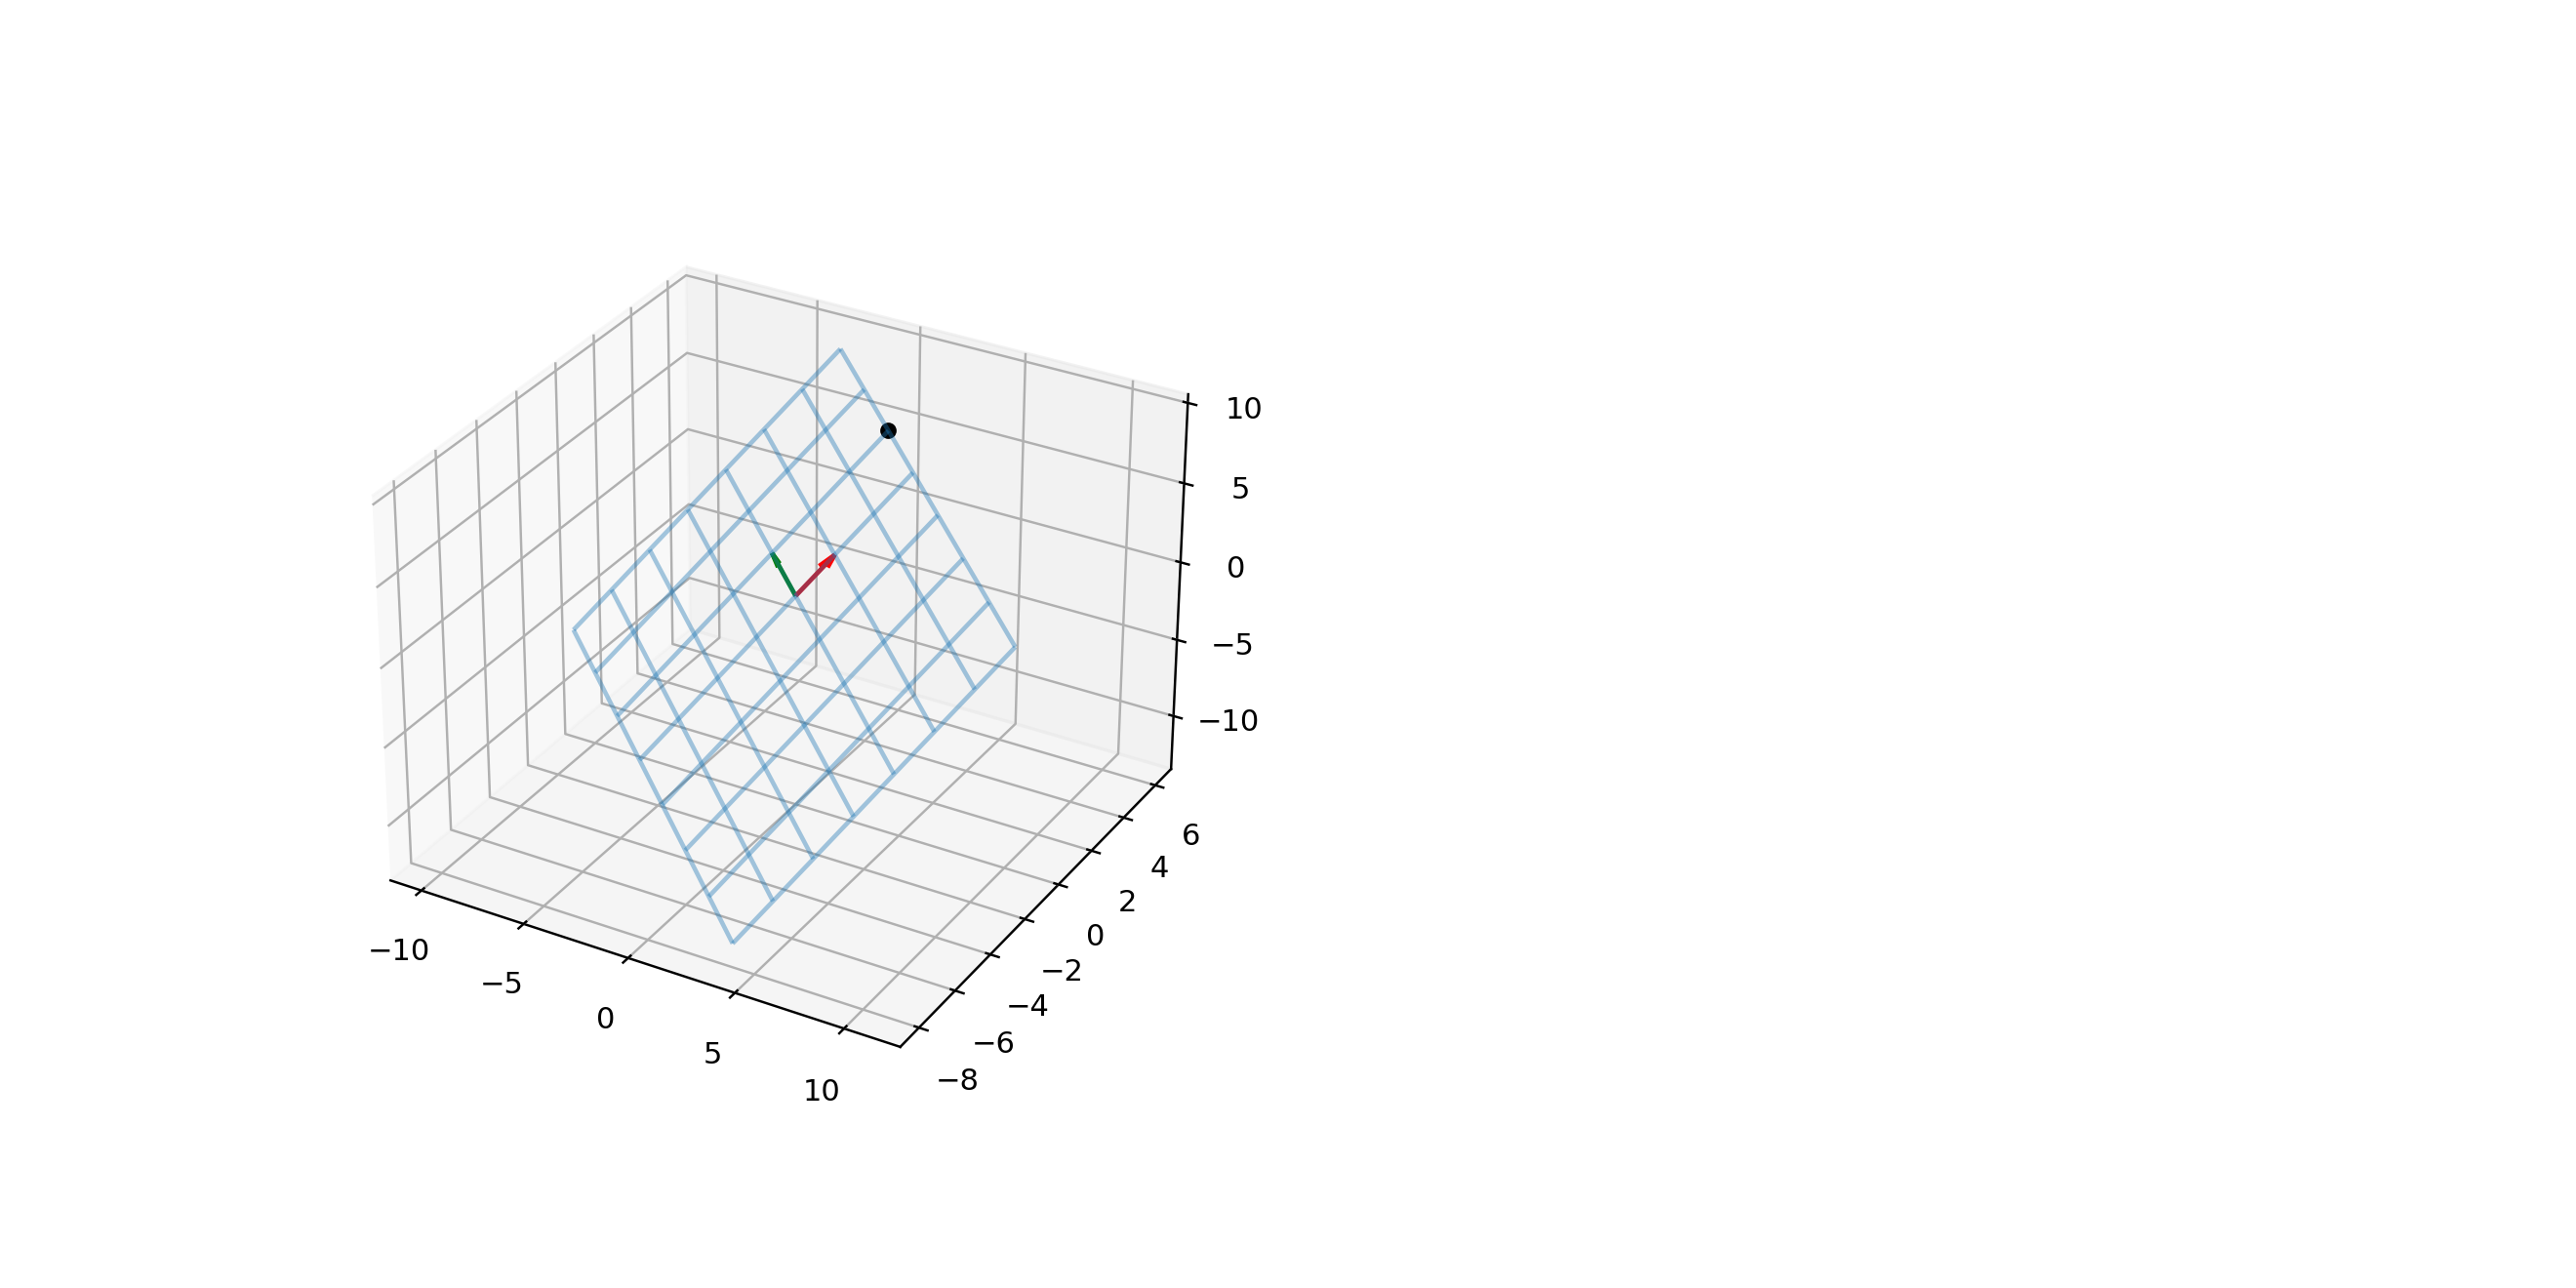

In [9]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')




x = np.arange(-4, 4, 1)
y = np.arange(-4, 4, 1)
X,Y = np.meshgrid(x,y)
Xt = X - 2* Y
Yt = X + Y
Z = 2*X + Y

ax.plot_wireframe(Xt, Yt, Z, alpha=0.4)
ax.quiver((0,),(0,),(0,),(1,),(1,),(2,), color='red', length=1)
ax.quiver((0,),(0,),(0,),(-2,),(1,),(1,), color='green', length=1)
ax.scatter3D((1,), (4,), (7,), color="black")
plt.show()


## Matrix multiplication

If $A$ is an $m\times n$ matrix and $B$ is a $n\times o$ matrix, than the **matrix product** $AB$ is an $m\times o$ matrix.

$$
\begin{aligned}
(AB)_{i,j} &= \sum_k a_{i,k}b_{kj}\\
&= A_{i,\_} \cdot B_{\_,j}
\end{aligned}
$$

<img src="_img/matrixMultiplication.jpg" width="600">

## properties of matrix multiplication

- matrix multiplication is **associative**

$$
(AB)C = A(BC)
$$

- matrix multiplication is **not commutative**. It is possible that
$$
AB \neq BA
$$

**Example**

$$
\begin{aligned}
\begin{bmatrix}
0 & 1 & 0\\
0 & 0 & 1\\
1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix} &=
\begin{bmatrix}
4 & 5 & 6\\
7 & 8 & 9\\
1 & 2 & 3\\
\end{bmatrix}\\[1em]
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
\begin{bmatrix}
0 & 1 & 0\\
0 & 0 & 1\\
1 & 0 & 0
\end{bmatrix}
&=
\begin{bmatrix}
2 & 3 & 1\\
5 & 6 & 4\\
8 & 9 & 7\\
\end{bmatrix}
\end{aligned}
$$

(There are cases where commutativity holds, but you cannot rely on it.)

## special matrices

- a **diagonal matrix** is a matrix where all entries except the *main diagonal* (all $a_{i,i}$) are zero

In [10]:
Matrix([
    [1,0,0],
    [0,2,0],
    [0,0,3]
])

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

In [11]:
Matrix([
    [3,0,0],
    [0,2,0],
    [0,0,1],
    [0,0,0]
])

Matrix([
[3, 0, 0],
[0, 2, 0],
[0, 0, 1],
[0, 0, 0]])

In [12]:
Matrix([
    [1,0,0,0],
    [0,2,0,0],
    [0,0,3,0]
])

Matrix([
[1, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 3, 0]])

- square diagonal matrices have interesting properties
    - multiplying a matrix $A$ from the *left* with a diagonal matrix multiplies each *row* of $A$ with the corresponding diagonal entry
    - multiplying a matrix $A$ from the *right* with a diagonal matrix multiplies each *column* of $A$ with the corresponding diagonal entry
    
$$
\begin{aligned}
\begin{bmatrix}
1 & 0 & 0\\
0 & 2 & 0\\
0 & 0 & 3
\end{bmatrix}
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix} &=
\begin{bmatrix}
1 & 2 & 3\\
8 & 10 & 12\\
21 & 24 & 27\\
\end{bmatrix}\\[1em]
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0\\
0 & 2 & 0\\
0 & 0 & 3
\end{bmatrix}
&=
\begin{bmatrix}
1 & 4 & 9\\
4 & 10 & 18\\
7 & 16 & 27\\
\end{bmatrix}
\end{aligned}
$$



## identity matrix

- a special case is $\mathbf I$, the diagonal matrix with only $1$s at the diagonal. It is called the **identity matrix**

$$
\begin{aligned}
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
1 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix} &=
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}\\[1em]
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
&=
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
\end{aligned}
$$

(NB: This is an example where commutativity happens to hold.)

- Strictly speaking, there is an $n\times n$ identity matrix for each number $n$ of dimensions. In mathematical contexts, we usually rely that the value of $n$ determined by the context. When programming, you have to be pedantic about theses things, of course.

## inverse matrix

- Given a square matrix $A$, the **inverse Matrix** $A^{-1}$ – if it exists – reduces $A$ to $\mathbf I$.

$$
A A^{-1} = A^{-1}A = \mathbf I
$$

- Note that $A^{-1}$ is both the left and the right multiplicative inverse.

- example:

$$
\begin{aligned}
A &= \begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}\\[1em]
A^{-1} &= 
\begin{bmatrix}
-2 & 1 \\
\frac{3}{2} & -\frac{1}{2}
\end{bmatrix}
\end{aligned}
$$
- example for a matrix without inverse:

$$
\begin{aligned}
B &= \begin{bmatrix}
1 & 2 \\
2 & 4
\end{bmatrix}\\
B^{-1} & \mathrm{~ is~ undefined}
\end{aligned}
$$

**Why is this so?**

Example of the “good” (invertable) matrix:

<IPython.core.display.Javascript object>


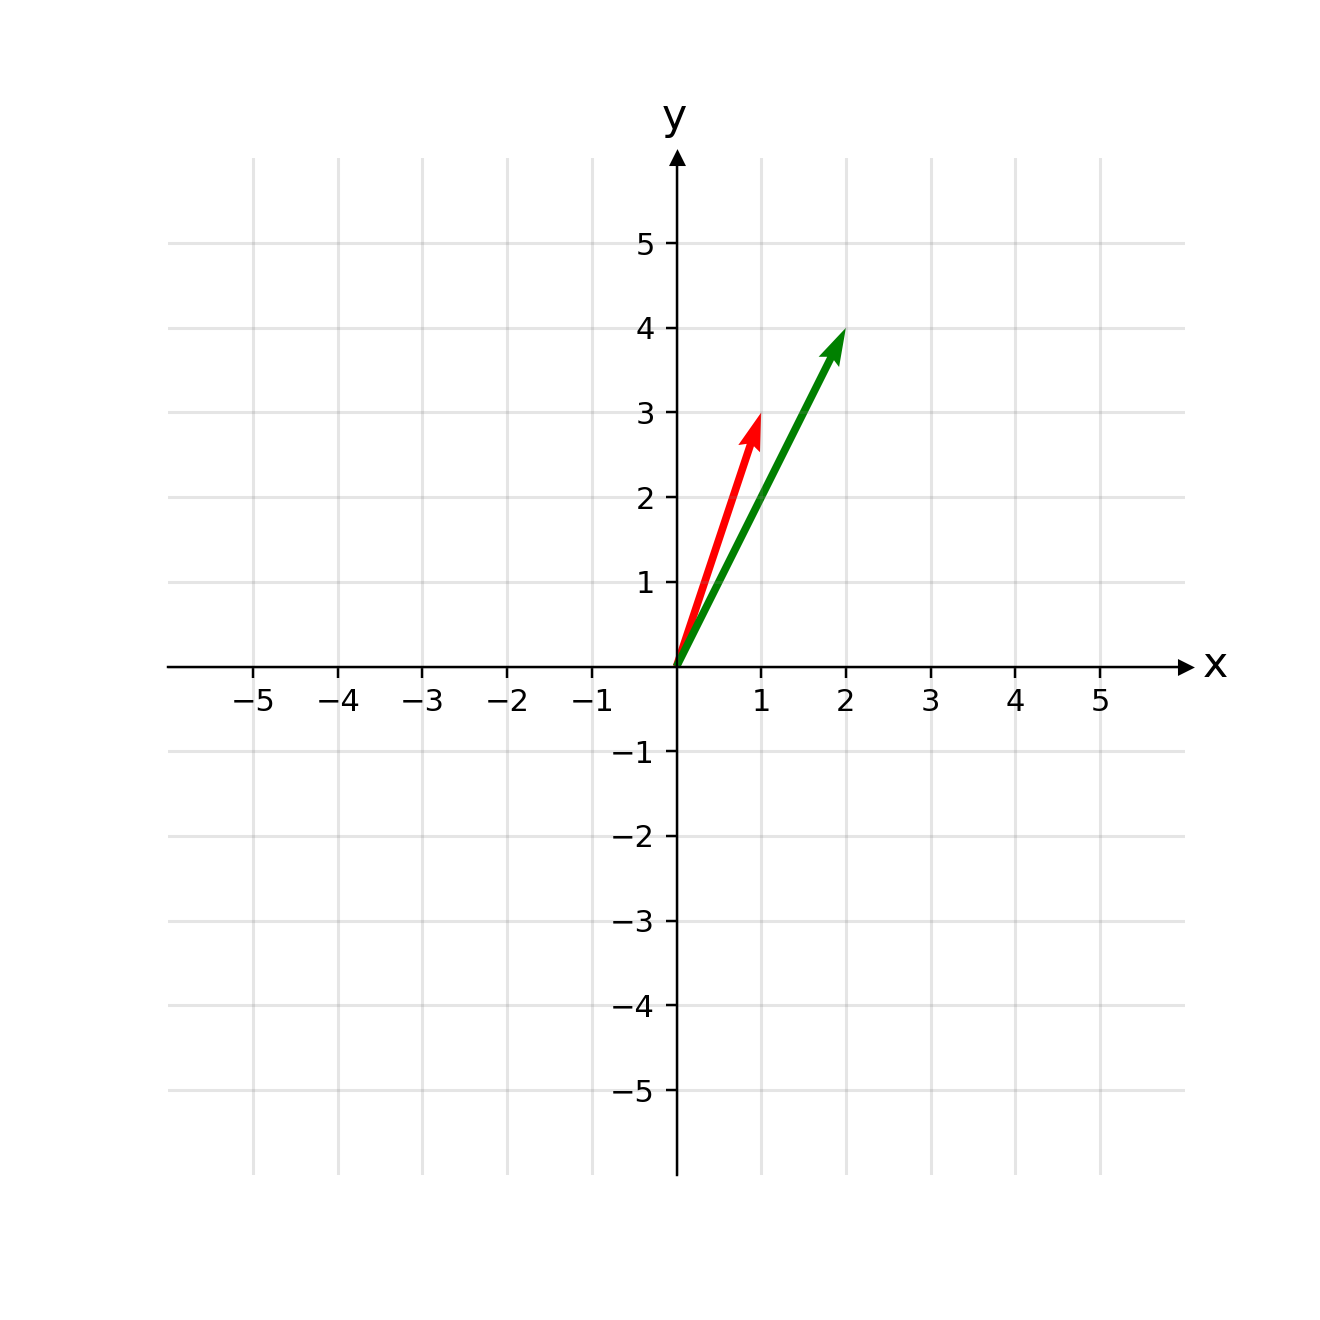

In [13]:
xs = [0, 2, -3, -1.5]
ys = [0, 3, 1, -2.5]
colors = ['m', 'g', 'r', 'b']

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

fig, ax = plt.subplots(figsize=(6,6))
# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)


# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

ax.quiver((0,),(0,), (1,), (3,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (2,), (4,), units="xy", scale=1, color='green')

Example of the “bad” (non-invertable) matrix:

<IPython.core.display.Javascript object>


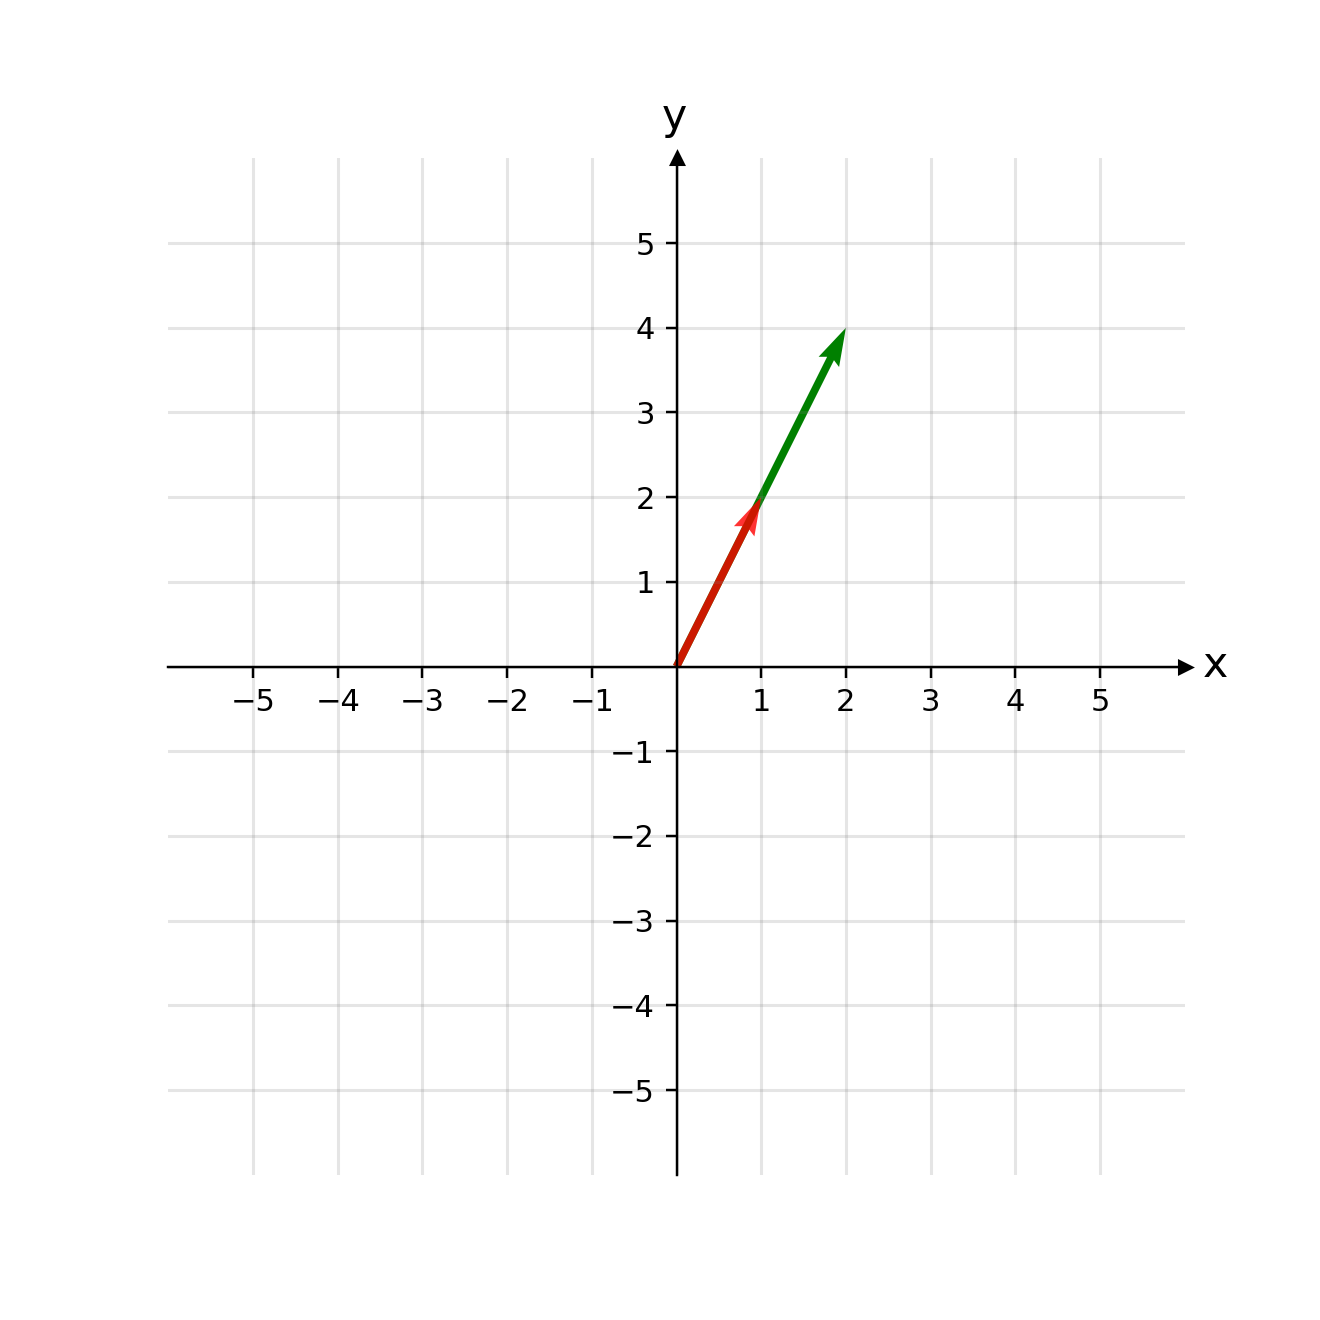

In [14]:
xs = [0, 2, -3, -1.5]
ys = [0, 3, 1, -2.5]
colors = ['m', 'g', 'r', 'b']

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

fig, ax = plt.subplots(figsize=(6,6))
# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)


# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

ax.quiver((0,),(0,), (2,), (4,), units="xy", scale=1, color='green')
ax.quiver((0,),(0,), (1,), (2,), units="xy", scale=1, color='red', alpha=0.8)

## examples of an invertable and a non-invertable matrix in 3d

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{bmatrix}\\[1em]
A^{-1} &=
\begin{bmatrix}
\frac{5}{63} & - \frac{22}{63} & \frac{1}{9}\\- \frac{11}{63} & - \frac{2}{63} & \frac{1}{18}\\\frac{1}{9} & \frac{1}{9} & \frac{1}{18}
\end{bmatrix}\\[1em]
B &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & -10
\end{bmatrix}\\[1em]
& \mathrm{~ is ~undefined}
\end{aligned}
$$

<IPython.core.display.Javascript object>


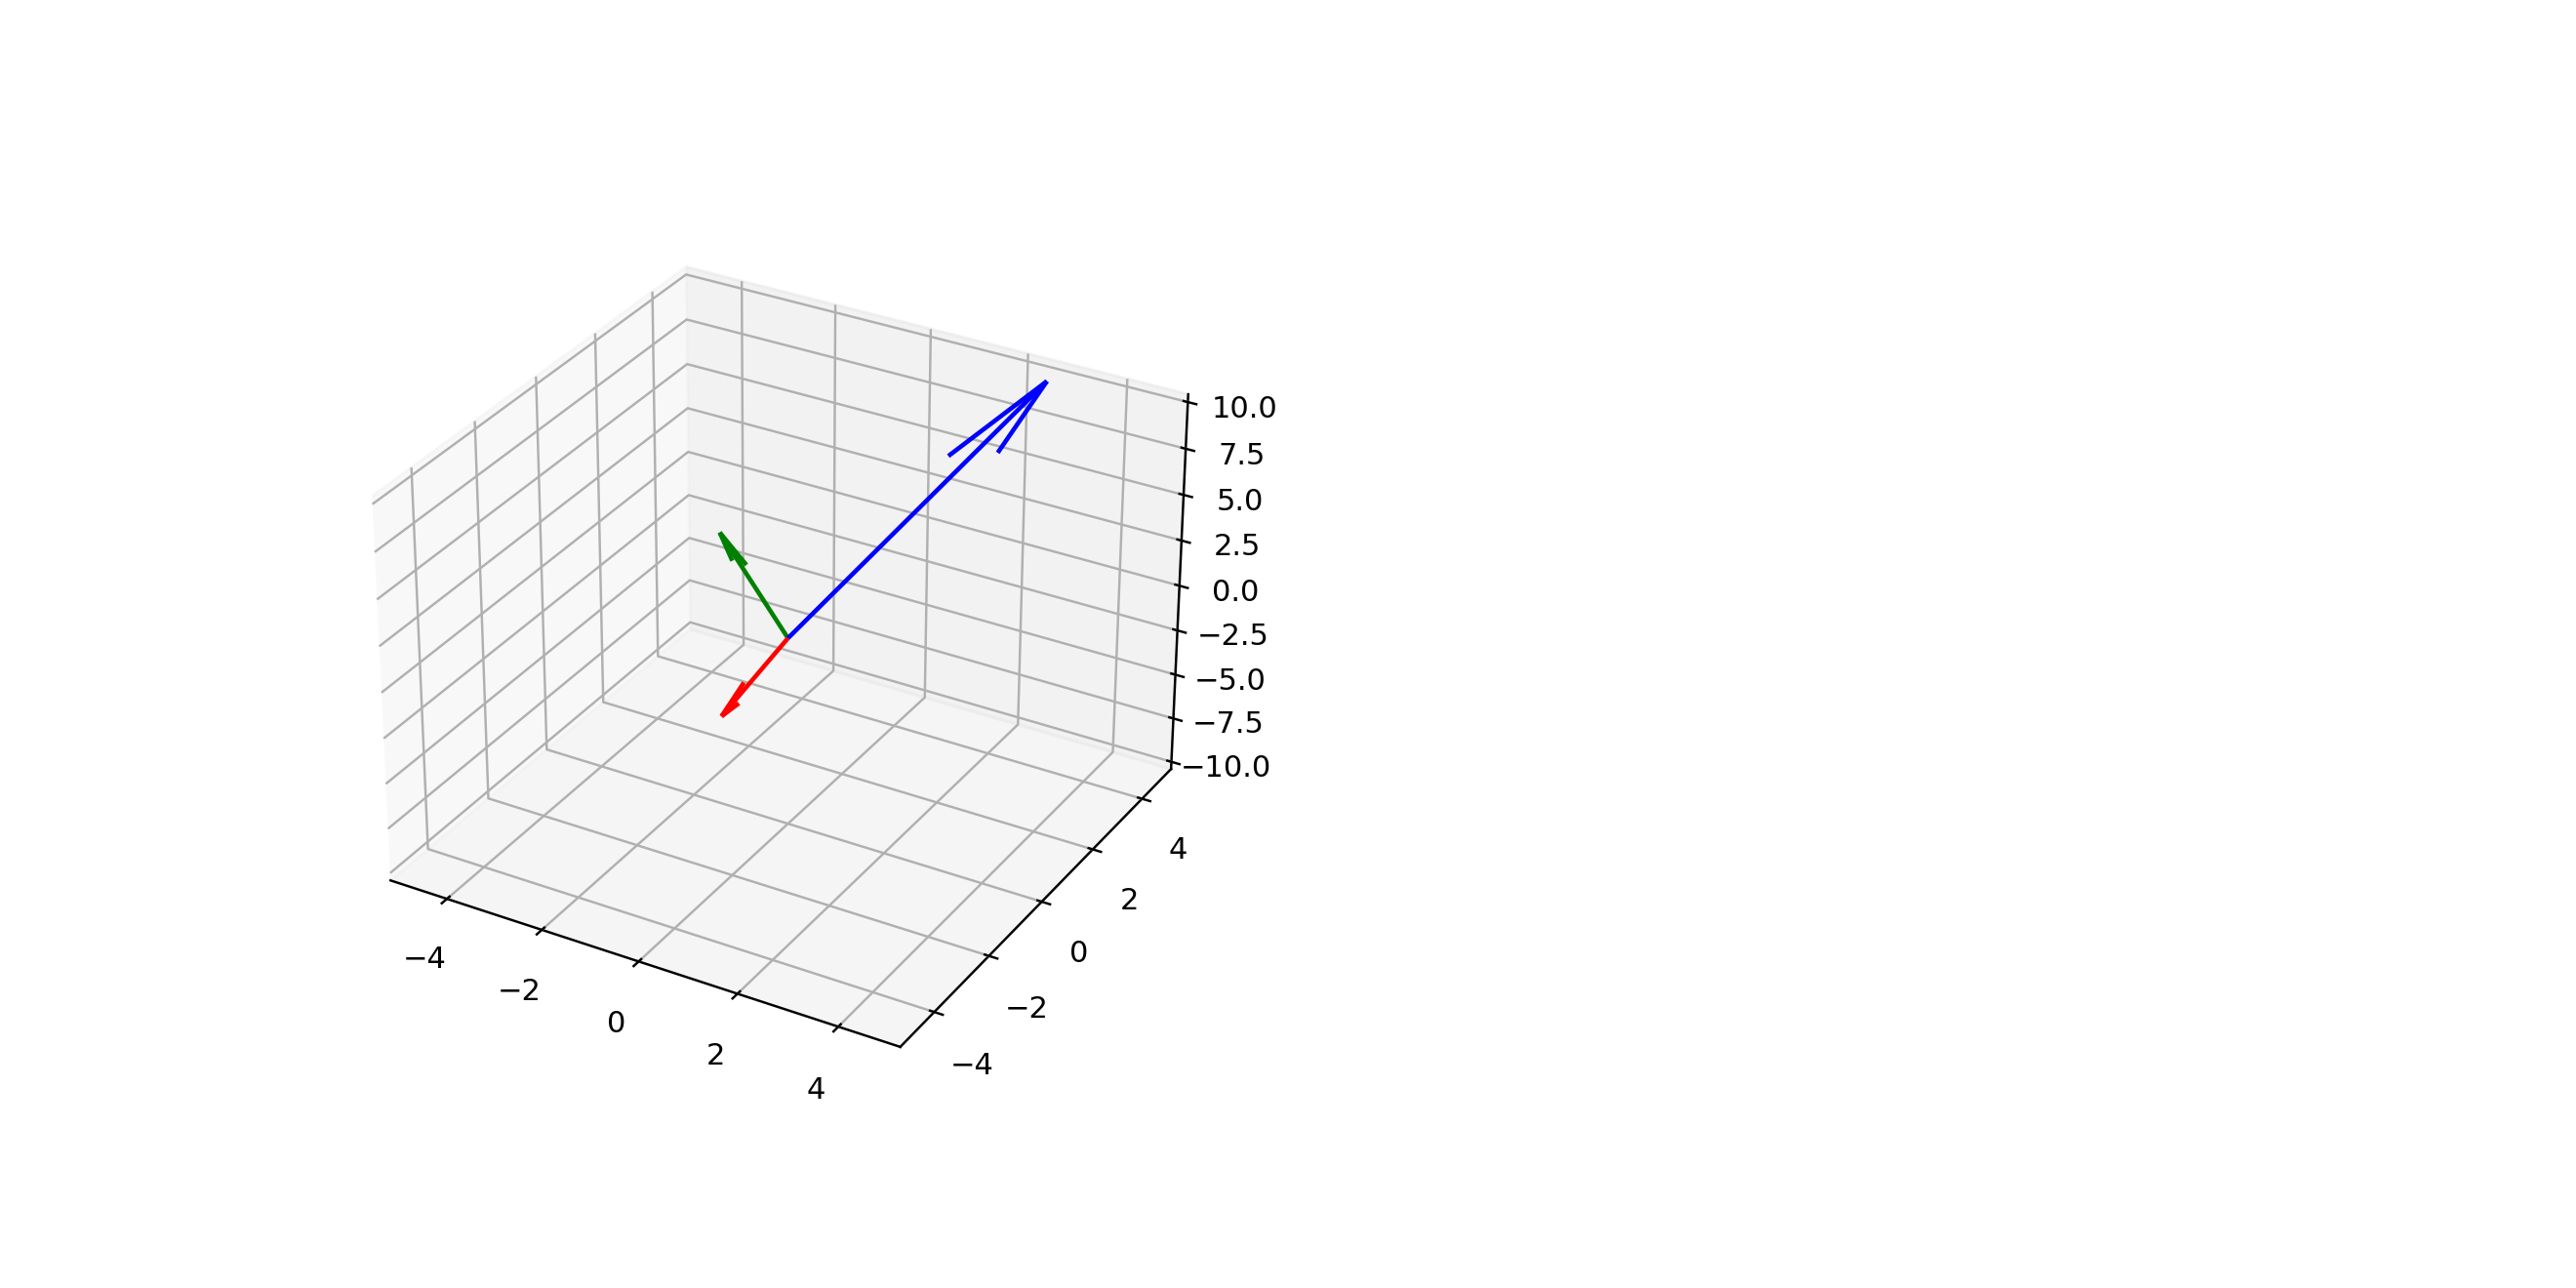

In [15]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')



ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-10,10)
ax.quiver((0,),(0,),(0,),(1,),(-4,),(2,), color='red', length=1)
ax.quiver((0,),(0,),(0,),(-2,),(1,),(3,), color='green', length=1)
ax.quiver((0,),(0,),(0,),(2,),(6,),(8,), color='blue', length=1)

plt.show()


<IPython.core.display.Javascript object>


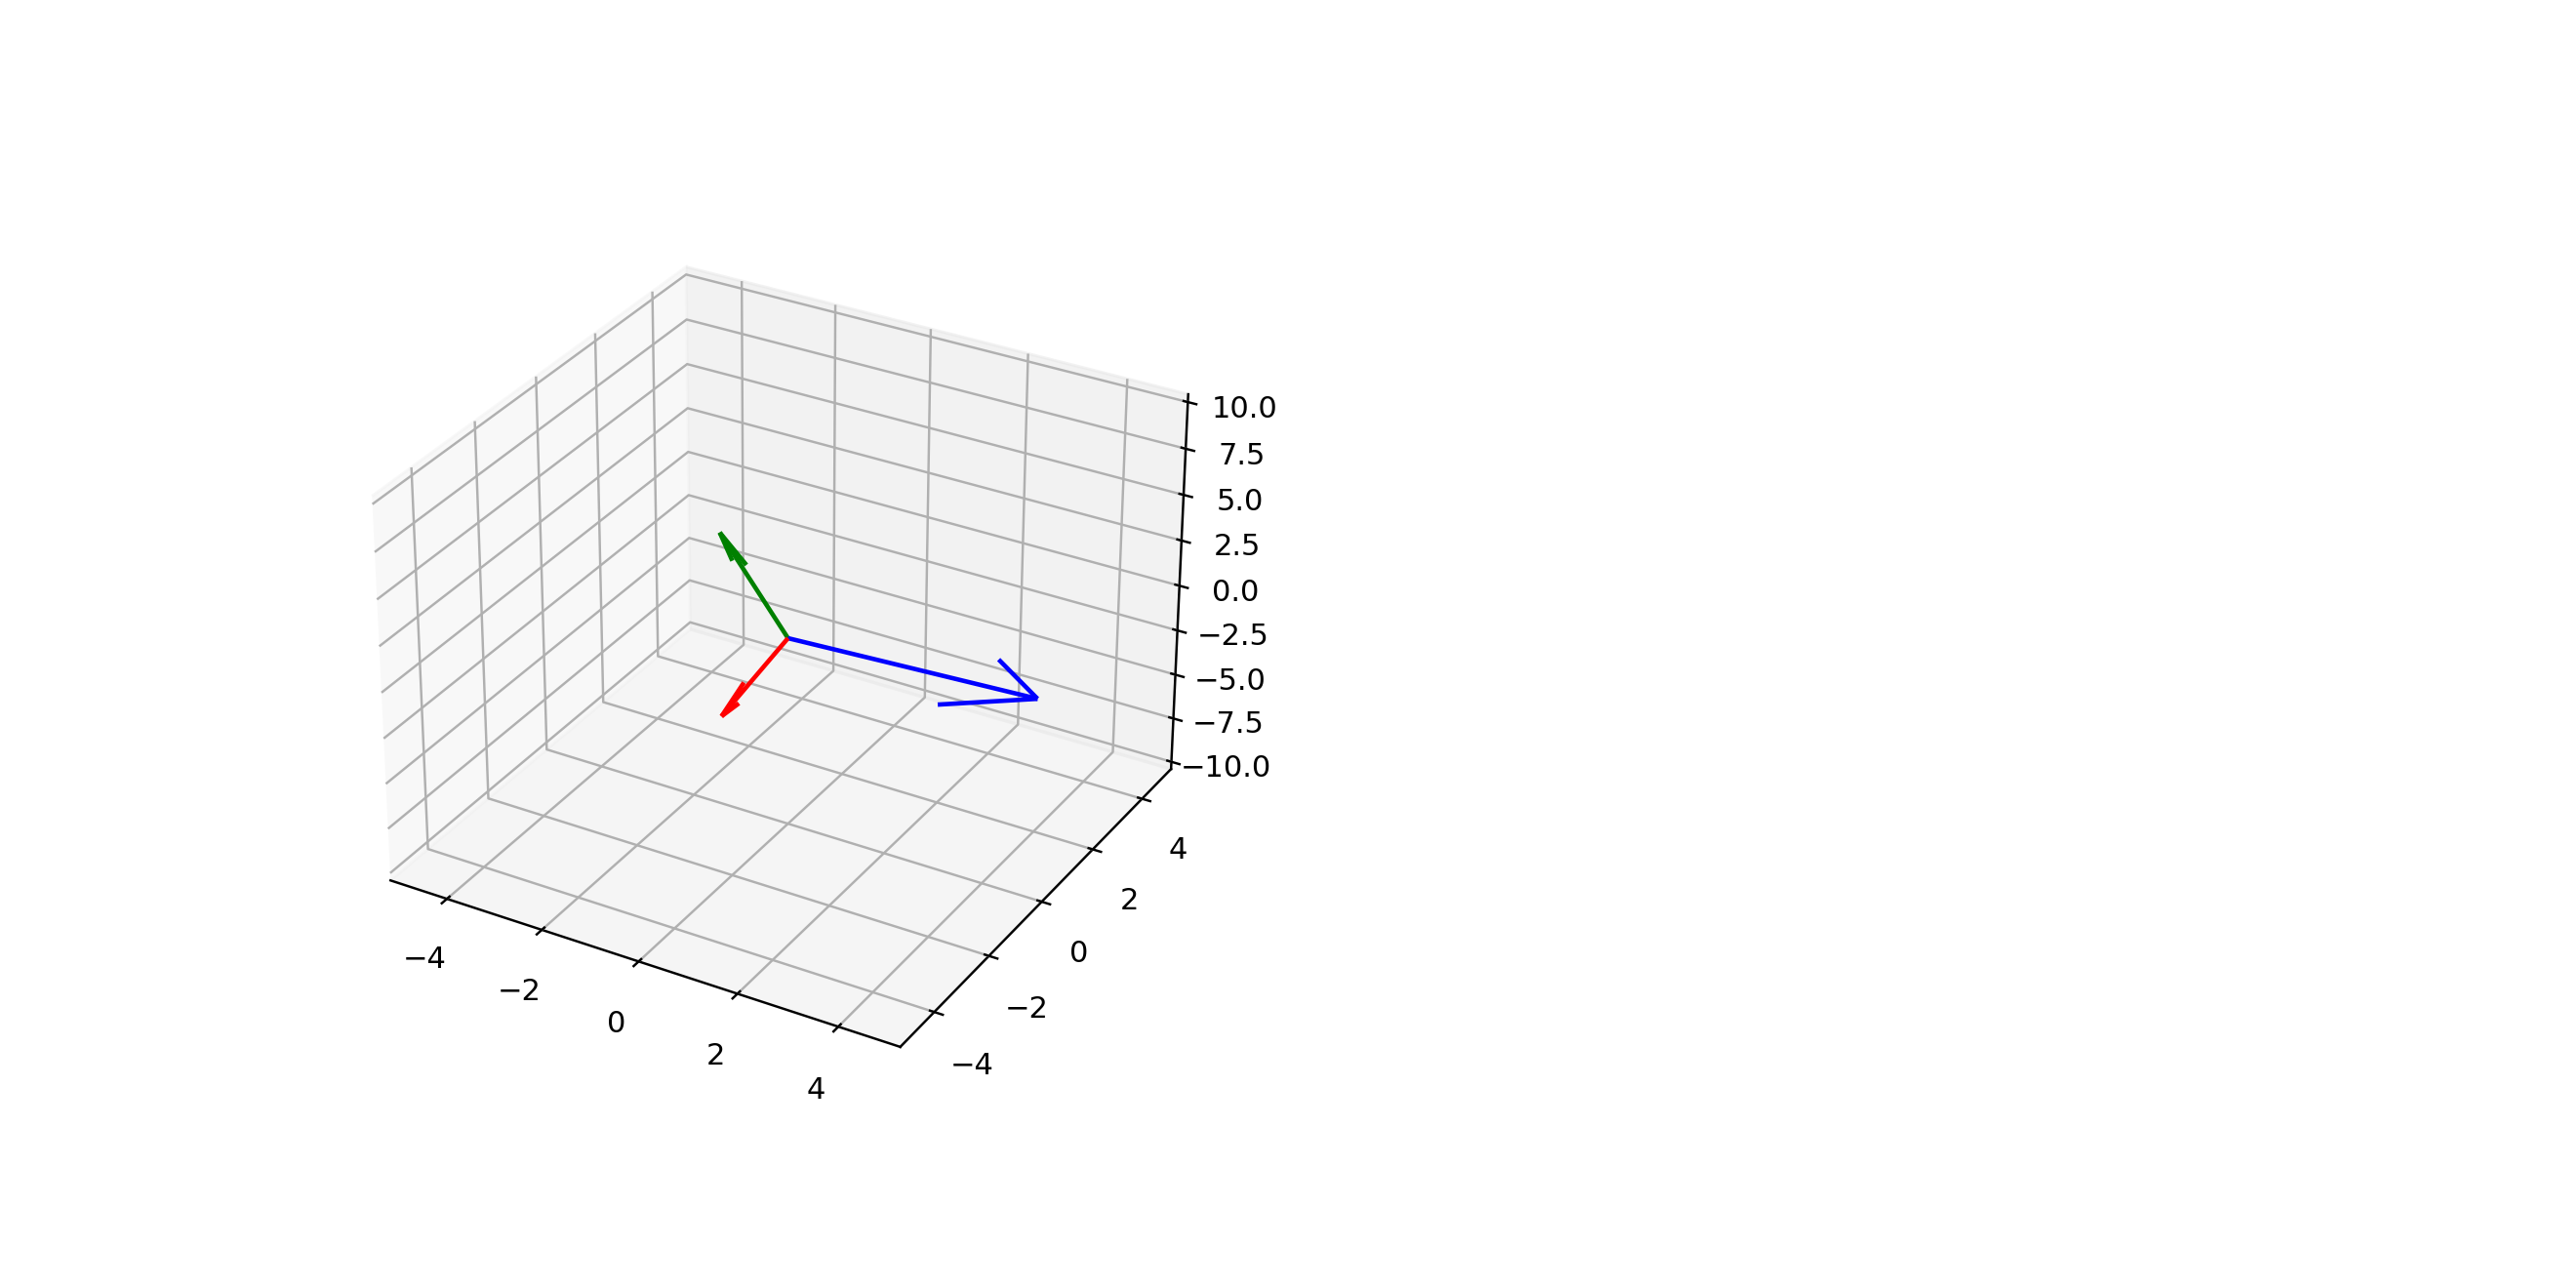

In [16]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')



ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-10,10)
ax.quiver((0,),(0,),(0,),(1,),(-4,),(2,), color='red', length=1)
ax.quiver((0,),(0,),(0,),(-2,),(1,),(3,), color='green', length=1)
ax.quiver((0,),(0,),(0,),(2,),(6,),(-10,), color='blue', length=1)

plt.show()


- a matrix is invertible if the **column space** has dimensionality $n$
- it is not invertible if the column space has dimensionality $<n$

## Matrices with python and numpy

- vector

In [17]:
import numpy as np
x = np.array([1,2,3])
x

array([1, 2, 3])

- matrix

In [18]:
A = np.array([
    [1,2, 3],
    [4,5,6],
    [7,8,9]
])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## vector algebra

In [19]:
y = np.array([3,10,4])

x + y

array([ 4, 12,  7])

In [20]:
3*x

array([3, 6, 9])

In [21]:
2*x - 3*y

array([ -7, -26,  -6])

applying a matrix to a vector

In [22]:
A, x

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([1, 2, 3]))

In [23]:
A @ x

array([14, 32, 50])

matrix transposition

In [24]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
A.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

matrix multiplication

In [26]:
B = np.array([
    [4,1,0],
    [1,0,2],
    [4,5,6]
])

In [27]:
A, B

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[4, 1, 0],
        [1, 0, 2],
        [4, 5, 6]]))

In [28]:
A @ B

array([[18, 16, 22],
       [45, 34, 46],
       [72, 52, 70]])

identity matrix

In [29]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

diagonal matrix

In [30]:
np.diag([2,3, 4])

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

inverse matrix

In [31]:
A = np.array(
[
    [1, -4, 2],
    [-2, 1, 3],
    [2,6,8]
])
A

array([[ 1, -4,  2],
       [-2,  1,  3],
       [ 2,  6,  8]])

In [32]:
np.linalg.inv(A)

array([[ 0.07936508, -0.34920635,  0.11111111],
       [-0.17460317, -0.03174603,  0.05555556],
       [ 0.11111111,  0.11111111,  0.05555556]])

In [33]:
B = np.array(
[
    [1, -4, 2],
    [-2, 1, 3],
    [2,6,-10]
])

In [34]:
B


array([[  1,  -4,   2],
       [ -2,   1,   3],
       [  2,   6, -10]])

In [35]:
from numpy.linalg import LinAlgError

try:
    np.linalg.inv(B)
except LinAlgError:
    print("matrix is not invertible")
        

matrix is not invertible


## Python and SymPy


In [36]:
import sympy
from sympy import Matrix

- creating a vector

In [37]:
x = Matrix([1,2,3])
x

Matrix([
[1],
[2],
[3]])

- creating a matrix

In [38]:
A = Matrix(
[
    [1,2, 3],
    [4,5,6],
    [7,8,9]
])
A

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

### vector algebra

In [39]:
y = Matrix([3,10,4])
y

Matrix([
[ 3],
[10],
[ 4]])

In [40]:
x+y

Matrix([
[ 4],
[12],
[ 7]])

In [41]:
3*x

Matrix([
[3],
[6],
[9]])

In [42]:
2 * x - 3 * y

Matrix([
[ -7],
[-26],
[ -6]])

applying a vector to a matrix

In [43]:
A * x

Matrix([
[14],
[32],
[50]])

matrix transposition

In [44]:
A.T

Matrix([
[1, 4, 7],
[2, 5, 8],
[3, 6, 9]])

matrix multiplication

In [45]:
B = Matrix(
[
    [4,1,0],
    [1,0,2],
    [4,5,6]
])
B

Matrix([
[4, 1, 0],
[1, 0, 2],
[4, 5, 6]])

In [46]:
A * B

Matrix([
[18, 16, 22],
[45, 34, 46],
[72, 52, 70]])

identity matrix

In [47]:
sympy.eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

diagonal matrix

In [48]:
sympy.diag(1,2,3)

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

matrix inverse

In [49]:
A = Matrix(
[
    [1, -4, 2],
    [-2, 1, 3],
    [2,6,8]
])

In [50]:
A.inv()

Matrix([
[  5/63, -22/63,  1/9],
[-11/63,  -2/63, 1/18],
[   1/9,    1/9, 1/18]])

In [51]:
B = Matrix(
[
    [1, -4, 2],
    [-2, 1, 3],
    [2,6,-10]
])

In [52]:
try:
    B.inv()
except ValueError:
    print("B is not invertible")

B is not invertible


### Symbolic computation with SymPy

The real strength of Sympy is that it can calculate with variables as well as with numbers.



In [53]:
from sympy import symbols
a,b,c,d = symbols('a b c d')

In [54]:
A = Matrix([
    [a, b],
    [c,d]
])
A

Matrix([
[a, b],
[c, d]])

In [55]:
A.inv()

Matrix([
[ d/(a*d - b*c), -b/(a*d - b*c)],
[-c/(a*d - b*c),  a/(a*d - b*c)]])